In [2]:
import pandas as pd
import numpy as np
import pydicom 
import os
import matplotlib.pyplot as plt

from skimage.measure import label,regionprops
from skimage.segmentation import clear_border

In [58]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv('sample_submission.csv')

In [60]:
test.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker
1,ID00421637202311550012437,15,2739,82.045291,68,Male,Ex-smoker
2,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker
3,ID00423637202312137826377,17,3294,79.258903,72,Male,Ex-smoker
4,ID00426637202313170790466,0,2925,71.824968,73,Male,Never smoked


In [59]:
submission.tail()

,Patient_Week,FVC,Confidence
725,ID00419637202311204720264_133,2000,100
726,ID00421637202311550012437_133,2000,100
727,ID00422637202311677017371_133,2000,100
728,ID00423637202312137826377_133,2000,100
729,ID00426637202313170790466_133,2000,100


In [4]:
def load_scans(path):
    slices = [pydicom.dcmread(path + '/' + file) for file in os.listdir(path)]
    slices.sort(key = lambda x : float(x.ImagePositionPatient[2]))
    return slices

In [5]:
example = 'train/' + train['Patient'][0]

In [67]:
def lung_slices_pic(slices):
    slices_3d = []
    for slc in slices:
        tmp_dicom = slc.pixel_array
        img = (tmp_dicom + slc.RescaleIntercept)/ slc.RescaleSlope
        img = img < -400
        img = clear_border(img)
        
        img = label(img)
        
        areas = [r.area for r in regionprops(img)]
        areas.sort()
        if len(areas) > 2:
            for region in regionprops(img):
                if region.area < areas[-2]:
                    for coordinates in region.coords:                
                        img[coordinates[0], coordinates[1]] = 0
        img = img > 0
        
        
        slices_3d.append(img*tmp_dicom)
        
    return np.array(slices_3d)

In [68]:
example_3d = lung_slices_pic(load_scans(example))

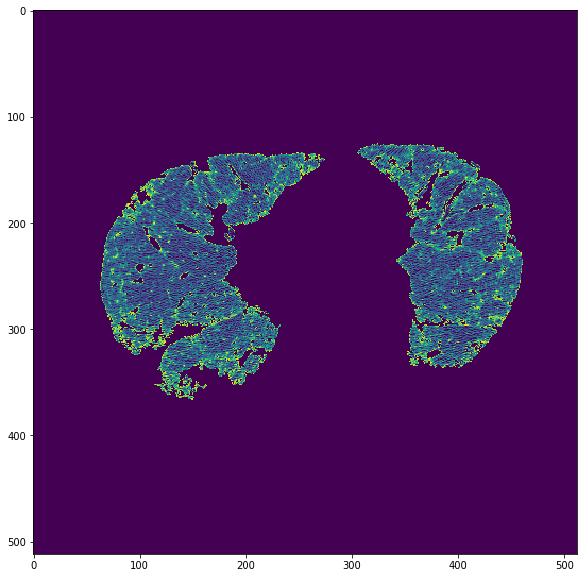

In [69]:
# fig = plt.figure(figsize=(10, 10))
# plt.imshow(example_3d[15]) 

In [70]:
example_3d

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [66]:
example_3d.shape

(30, 512, 512)

In [ ]:
train_df=pd.DataFrame